# Evaluating the predictive capabilities of bitcoin tendencies based on crypto-sentiment indexes 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests

## Crypto Fear & Greed Index

In [8]:
url = 'https://api.alternative.me/fng/?limit=0'

In [17]:
params = {'date_format' : 'world'}
response = requests.get(url,params=params)

In [18]:
status_code = response.status_code
status_code

200

In [22]:
data = response.json()
data.keys()

dict_keys(['name', 'data', 'metadata'])

In [24]:
data['data']

[{'value': '78',
  'value_classification': 'Extreme Greed',
  'timestamp': '02-03-2021',
  'time_until_update': '-1614596998'},
 {'value': '38', 'value_classification': 'Fear', 'timestamp': '01-03-2021'},
 {'value': '55', 'value_classification': 'Greed', 'timestamp': '28-02-2021'},
 {'value': '56', 'value_classification': 'Greed', 'timestamp': '27-02-2021'},
 {'value': '55', 'value_classification': 'Greed', 'timestamp': '26-02-2021'},
 {'value': '79',
  'value_classification': 'Extreme Greed',
  'timestamp': '25-02-2021'},
 {'value': '76',
  'value_classification': 'Extreme Greed',
  'timestamp': '24-02-2021'},
 {'value': '94',
  'value_classification': 'Extreme Greed',
  'timestamp': '23-02-2021'},
 {'value': '94',
  'value_classification': 'Extreme Greed',
  'timestamp': '22-02-2021'},
 {'value': '91',
  'value_classification': 'Extreme Greed',
  'timestamp': '21-02-2021'},
 {'value': '91',
  'value_classification': 'Extreme Greed',
  'timestamp': '20-02-2021'},
 {'value': '93',
  'v

In [39]:
clean_data = pd.DataFrame(data['data']).drop(columns=['value_classification','time_until_update'])
clean_data 

,value,timestamp
0,78,02-03-2021
1,38,01-03-2021
2,55,28-02-2021
3,56,27-02-2021
4,55,26-02-2021
...,...,...
1118,11,05-02-2018
1119,24,04-02-2018
1120,40,03-02-2018
1121,15,02-02-2018


In [42]:
clean_data.dtypes

value        object
timestamp    object
dtype: object

In [43]:
clean_data['timestamp'] = pd.to_datetime(clean_data['timestamp'],format='%d-%m-%Y')

In [44]:
clean_data.dtypes

value                object
timestamp    datetime64[ns]
dtype: object

In [45]:
clean_data

,value,timestamp
0,78,2021-03-02
1,38,2021-03-01
2,55,2021-02-28
3,56,2021-02-27
4,55,2021-02-26
...,...,...
1118,11,2018-02-05
1119,24,2018-02-04
1120,40,2018-02-03
1121,15,2018-02-02


In [49]:
clean_data.columns = ['Fear&Greed', 'timestamp']
df = clean_data.set_index('timestamp')

In [50]:
df

,Fear&Greed
timestamp,
2021-03-02,78
2021-03-01,38
2021-02-28,55
2021-02-27,56
2021-02-26,55
...,...
2018-02-05,11
2018-02-04,24
2018-02-03,40


<AxesSubplot:xlabel='timestamp'>

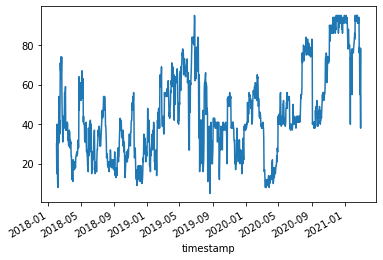

In [116]:
pd.to_numeric(df['Fear&Greed']).plot()

## Augmento index

In [91]:
topics_url = "http://api-dev.augmento.ai/v0.1/topics"
topics_index = requests.get(topics_url).json()
topics_index

{'0': 'Hacks',
 '1': 'Pessimistic/Doubtful',
 '2': 'Banks',
 '3': 'Selling',
 '4': 'Market_manipulation',
 '5': '(De-)centralisation',
 '6': 'Angry',
 '7': 'ETF',
 '8': 'Leverage',
 '9': 'Bottom',
 '10': 'Institutional_money',
 '11': 'FOMO',
 '12': 'Prediction',
 '13': 'Adoption',
 '14': 'Fearful/Concerned',
 '15': 'Portfolio',
 '16': 'FUD_theme',
 '17': 'Whitepaper',
 '18': 'Announcements',
 '19': 'Technical_analysis',
 '20': 'Flippening',
 '21': 'Community',
 '22': 'Investing/Trading',
 '23': 'Euphoric/Excited',
 '24': 'Hodling',
 '25': 'ICO',
 '26': 'Bearish',
 '27': 'Going_short',
 '28': 'Uncertain',
 '29': 'Volume',
 '30': 'Risk',
 '31': 'Governance',
 '32': 'Ban',
 '33': 'Cheap',
 '34': 'Short_term_trading',
 '35': 'Fork',
 '36': 'Progress',
 '37': 'Shilling',
 '38': 'Bullish',
 '39': 'Happy',
 '40': 'Bubble',
 '41': 'Bots',
 '42': 'Hopeful',
 '43': 'Bug',
 '44': 'Open_source',
 '45': 'Token_economics',
 '46': 'Security',
 '47': 'Marketing',
 '48': 'Bad_news',
 '49': 'Due_diligen

In [117]:
topics_index_value = {'0': 0, '1': -1, '2': 0, '3': -1, '4': 0, '5': 0, '6': -1, '7': 0, '8': 0, '9': 0, '10': 0,
 '11': 0, '12': 0, '13': 0, '14': -1, '15': 0, '16': -1, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0,
 '23': 1, '24': 1, '25': 0, '26': -1, '27': -1, '28': 0, '29': 0, '30': 0, '31': 0, '32': -1, '33': 1, '34': 0,
 '35': 0, '36': 1, '37': -1, '38': 1, '39': 1, '40': -1, '41': 0, '42': 1, '43': 0, '44': 0, '45': 0, '46': 1,
 '47': 0, '48': -1, '49': 0, '50': 0, '51': 0, '52': 0, '53': -1, '54': -1, '55': 0, '56': 0, '57': 0, '58': 0,
 '59': 0, '60': 0, '61': 0, '62': 0, '63': 1, '64': -1, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0,
 '71': 1, '72': 0, '73': -1, '74': 0, '75': 1, '76': 0, '77': 0, '78': 0, '79': 0, '80': 0, '81': -1, '82': 1,
 '83': 1, '84': -1, '85': -1, '86': 0, '87': 0, '88': 0, '89': -1, '90': 0, '91': 1, '92': -1}

In [169]:
# url_agg = "http://api-dev.augmento.ai/v0.1/events/aggregated"
# params = {
#   "source" : "twitter",
#   "coin" : "bitcoin",
#   "bin_size" : "24H",
#   "count_ptr" : 1000,
#   "start_ptr" : 0,
#   "start_datetime" : "2018-02-01T00:00:00Z",
#   "end_datetime" : "2020-04-30T00:00:00Z",
# }
# data_2 = requests.get(url_agg, params=params).json()
# topics_count_df = pd.DataFrame(data_2).drop(columns=['t_epoch'])
# topics_count_df['datetime'] = pd.to_datetime(topics_count_df['datetime']).dt.date

In [170]:
# def feature_creation(counts):
#     positive_counts = []
#     neg_counts = []
#     for key, value in topics_index_value.items():
#         if value==1:
#             positive_counts.append(counts[int(key)])
#         elif value==-1:
#             neg_counts.append(counts[int(key)])
#     X = (sum(positive_counts)+sum(neg_counts))
#     if X==0:
#         return np.NaN
#     else:
#         return sum(positive_counts)/X

# topics_count_df['score'] = topics_count_df['counts'].apply(feature_creation)

In [ ]:
pd.read_csv("../data/")

## Historical Data 

In [3]:
historical_data = pd.read_csv('../raw_data/coin_Bitcoin.csv')
historical_data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [4]:
# It seems that the Fear & Greed index already takes into account market Volume
# Therefore to avoid colinearity we might have to drop it but we will keep it for now

In [5]:
hist_df = historical_data.drop(columns=['SNo','Name','Symbol'])

In [6]:
hist_df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [7]:
hist_df.shape[0]

2862

In [8]:
Dates = []
for i in range(hist_df.shape[0]):
    Dates.append(hist_df['Date'][i][0:10])

In [9]:
hist_df['Date'] = Dates

In [10]:
hist_df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2857,2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [11]:
hist_df['Date'] = pd.to_datetime(hist_df['Date'],format='%Y-%m-%d')

In [12]:
hist_df = hist_df.rename(columns={"Date": "timestamp"})

In [13]:
hist_df.dtypes

timestamp    datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [14]:
hist_df = hist_df.set_index('timestamp')

In [15]:
# DATES ARE FLIPPED!
hist_df = hist_df.sort_index(ascending=False)

In [16]:
hist_df

,High,Low,Open,Close,Volume,Marketcap
timestamp,,,,,,
2021-02-27,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11
2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
...,...,...,...,...,...,...
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09


In [17]:
# DATES ARE FLIPPED!
hist_df.to_csv('../data/kaggle_historical_df.csv')

## Historical API

In [157]:
# url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/'
# parameters = {
#   'start':'1',
#   'limit':'5000',
#   'convert':'USD'}

# headers = {
#   'Accepts': 'application/json',
#   'X-CMC_PRO_API_KEY': '4dff8728-6fa2-41b0-a7fd-ab78046ee5be'}

# response2 = requests.get(url,params=parameters,headers=headers)

# print(response2)
# print(response2.json())
